# Chaos

In [668]:
using Plots
using Distributions
using Random
using StatsBase
using LaTeXStrings

using LinearAlgebra

In [669]:
new = [CartesianIndex()]

1-element Array{CartesianIndex{0},1}:
 CartesianIndex()

In [670]:
default(size=(600, 300))

In [671]:
logistic_map(x, r) = r * x * (1 - x)

"""
Compute iterations of the logistic map

# Arguments
- `x0::Float64`: Starting value
- `r::Float64`: System value
- `n_iterations::Int64`: number of iterations
"""
function logistic_hist(x0::Float64, r::Float64, n_iterations::Int64=500)
    x_vals = zeros(n_iterations)
    x_vals[begin] = x0
    x = x0
    for n=2:n_iterations
        x = logistic_map(x, r)
        x_vals[n] = x
    end
    
    return x_vals
end

function plot_logistic_hist(x0, r, n_iterations=500; kwargs...)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn", markersize=1; kwargs...)
    plot!(title="Logistic | r=$r")
end

function plot_logistic_hist!(x0, r, n_iterations=500; kwargs...)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot!(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn"; kwargs...)
    plot!(title="Logistic | r=$r")
end

plot_logistic_hist! (generic function with 2 methods)

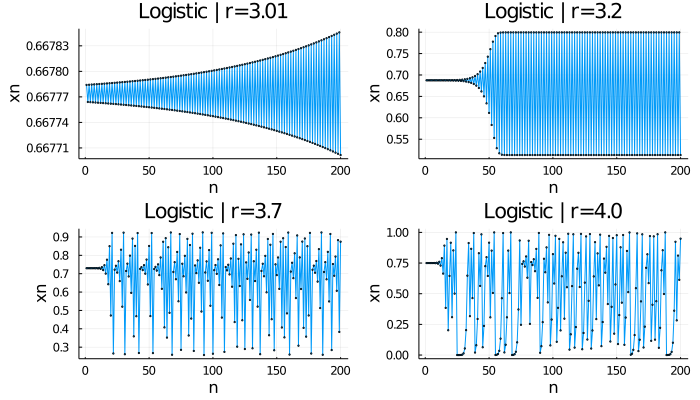

In [672]:
ϵ = 1e-5
rvals = 3.01, 3.2, 3.7, 4.

plots = Any[]
n_steps = 200
for r in rvals
    x0 = 1 - 1 / r
    p = plot_logistic_hist(x0 + ϵ, r, n_steps)
    append!(plots, (p,))
end

plot(plots..., size=(700, 400))


In [ ]:
r_vals = 0.9:0.01:4

iterated_values = zeros(0)
iterated_r_values = zeros(0)

x0 = 0.2
n_steps = 10_000
sample_size = 200
xrange = collect(0:100:sample_size)
xrange_ticks = n_steps .- reverse(xrange)
xrange_ticks = string.(xrange_ticks)
@gif for (i, r) in enumerate(r_vals)
    truncated_hist = round.(logistic_hist(x0, r, n_steps)[end-sample_size:end], digits=5)
    iterated_r = unique(truncated_hist)
    n_unique = size(iterated_r)
    append!(iterated_values, iterated_r)
    append!(iterated_r_values, ones(n_unique) .* r)
    # Bifurcation map
    markersize = max(1.2, 5 * (1 - i/250))
    p1 = scatter(iterated_r_values, iterated_values, markersize=markersize, markerstrokewidth=0, label=nothing)
    plot!(title="Bifurcation Map", xlabel=L"r", ylabel=L"x^* = f(x^*, r)")
    # trajectory
    p2 = plot(truncated_hist, label=L"x_n", xlabel=L"n", linewidth=2)
    plot!(xlabel=L"n", title=L"x_{n+1} = %$r x_n (1 - x_n); x_0=%$x0")
    ylims!(0, 1)
    xticks!(xrange, xrange_ticks)
    # Show everything
    plot(p1, p2, size=(700, 200))
end

In [7]:
scatter(iterated_r_values, iterated_values, markersize=1, markerstrokewidth=0, label=nothing)

In [385]:
n_rvals= size(iterated_r_values)[1]

init_r_array = Array{Bool}(undef, 1)
for n=1:n_rvals
    if n == 1
        append!(init_r_array, true)
    elseif iterated_r_values[n-1] == iterated_r_values[n]
        append!(init_r_array, false)
    else
        append!(init_r_array, true)
    end
end
init_r_array[end-100:end] .= true;

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif")
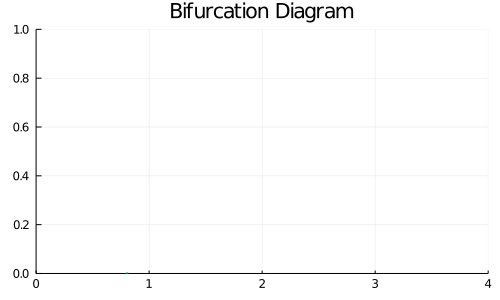

In [386]:
@gif for n=1:n_rvals
    plot(title="Bifurcation Diagram")
    scatter!(iterated_r_values[begin:n], iterated_values[begin:n],
                markersize=2,
                markerstrokewidth=0,
                label=nothing,
                size=(500, 300),
                ylim=(0, 1), xlim=(0, 4))
end when init_r_array[n]

In [50]:
Random.seed!(3145)
rand(Bernoulli(0.45), 6)

6-element Array{Bool,1}:
 1
 0
 1
 0
 0
 0

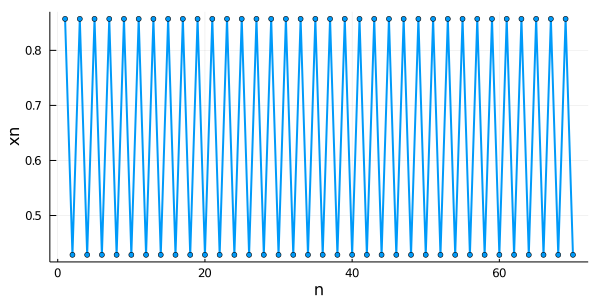

In [41]:
x0, r = 6/7, 3.5
plot_logistic_hist(x0, r, 70, linewidth=2, markersize=3)
plot!(title="")

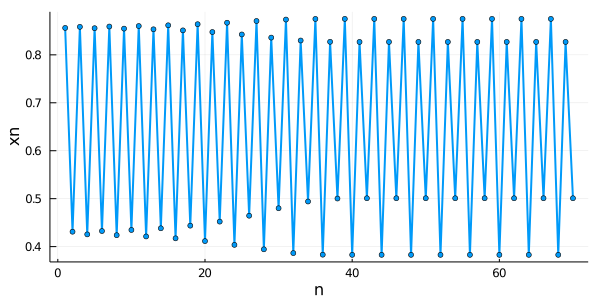

In [40]:
x0, r = 6/7 - 0.001, 3.5
plot_logistic_hist(x0, r, 70, linewidth=2, markersize=3)
plot!(title="")

In [667]:
x0, r = 13/18 - 0.01, 3.6
plot_logistic_hist(x0, r, 70, linewidth=2, markersize=3)
plot!(title="")

LoadError: UndefVarError: plot_logistic_hist not defined

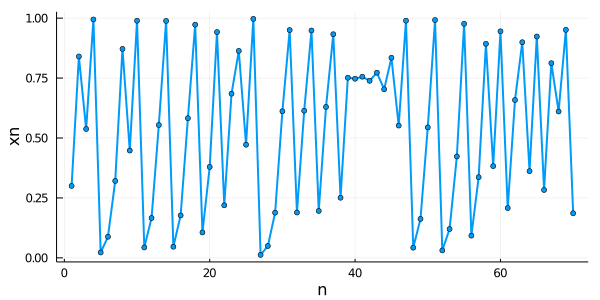

In [38]:
x0, r = 0.3, 4.0
plot_logistic_hist(x0, r, 70, linewidth=2, markersize=3)
plot!(title="")

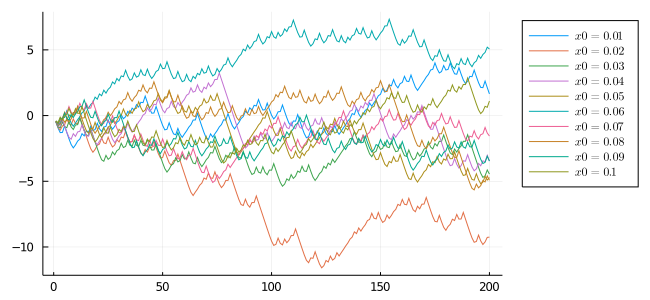

In [48]:
r = 4.0
x0_vals = range(0.01, 0.1, length=10)
labels = collect(L"x0=%$x0" for x0 in x0_vals)[new, :]
trajectories = hcat(logistic_hist.(x0_vals, r, 200)...) .- 0.5
trajectories = cumsum(trajectories, dims=1)

plot(trajectories, size=(650, 300), legend=:outertopright, labels=labels)
# plot!(title=L"X_{N} = \sum_{n=1}^{N-1} \left[4x_n (1-x_n) - 0.5\right]")
#savefig("chaos_process.pdf")

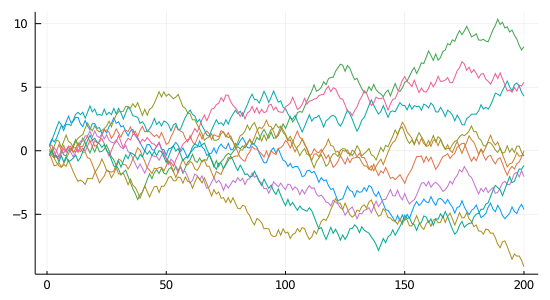

In [178]:
Random.seed!(314)
simulations = cumsum(rand(Arcsine(0, 1), (200, 10)) .- 0.5, dims=1)
plot(simulations, label=nothing, size=(550, 300))

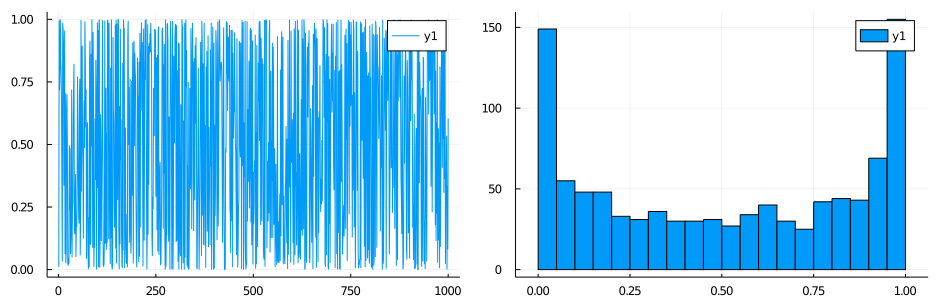

In [19]:
sample_process = rand(Arcsine(0, 1), 1000)

p1 = plot(sample_process)
p2 = histogram(sample_process, bins=30)
plot(p1, p2, size=(470 * 2, 300))

## Continous Dynamics

In [28]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278


In [33]:
f(u, p, t) = 1.01 * u
u0 = 1/2
tspan = (0.0, 1.0)
system = ODEProblem(f, u0, tspan)
sol = solve(system)

retcode: Success
Interpolation: automatic order switching interpolation
t: 6-element Array{Float64,1}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 1.0
u: 6-element Array{Float64,1}:
 0.5
 0.50000000505
 0.5000006110499999
 0.50006222105
 0.50623332105
 1.0049999999999997

In [816]:
function f_linear(u, p, t)
    a = p
    x, y = u
    ẋ = - (x + y)
    ẏ = a * x - y
    return [ẋ; ẏ]
end

function duffing(u, p, t)
    a = p
    x, y = u
    ẋ = 1.1y
    ẏ = - a * y + x - x ^ 3
    return [ẋ; ẏ]
end

function sync(u, p, t)
    a, K = p
    S1 = duffing(u[1:2], a, t) .- K * (2u[1:2] - u[3:4] - u[5:6])
    S2 = duffing(u[3:4], a, t) .- K * (2u[3:4] - u[1:2] - u[5:6])
    S3 = duffing(u[5:6], a, t) .- K * (2u[5:6] - u[1:2] - u[3:4])
    return [S1; S2; S3]
end


function sync1(u, p, t)
    a, K = p
    u_ordered = [u[1:2:end] u[2:2:end]]
    N, M = size(u_ordered)
    # Laplacian Matrix (coupling factor)
    Gmat = -ones(N, N)
    Gmat[diagind(Gmat)] .= N - 1
    

    Xdot = vcat(duffing.(eachrow(u_ordered), a, t)'...) - K * Gmat * u_ordered
    
    return reshape(Xdot', :)
end

sync1 (generic function with 1 method)

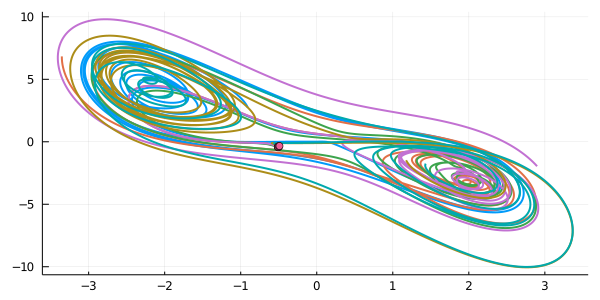

In [843]:
u0 = [-0.512;  -0.41;
      -0.501; -0.42;
      -0.51; -0.444;
      -0.51; -0.39;
      -0.5; -0.342;
      -0.49; -0.341;]

T = 30.0
p = (3.79, -0.33)
tspan = (0.0, T)
system = ODEProblem(sync1, u0, tspan, p)
sol = solve(system)

Δt = 0.01
simulation = sol(0:Δt:T)
simulation = hcat(simulation.u...)

n_entries = size(u0)[1]
n_components = n_entries ÷ 2

plot()
for i in 1:n_components
    xc, yc = 2(i-1)+1, 2i
    plot!(simulation[xc, :], simulation[yc, :], linewidth=2)
end
init_point = sol.u[begin]
scatter!(init_point[1:2:end], init_point[2:2:end])
plot!(legend=nothing)


In [844]:
x_axis = simulation[begin:2:end, :]
y_axis = simulation[2:2:end, :]
xmin, xmax = minimum(x_axis), maximum(x_axis)
ymin, ymax = minimum(y_axis), maximum(y_axis)

(-10.047735318266643, 9.805398352144536)

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif")
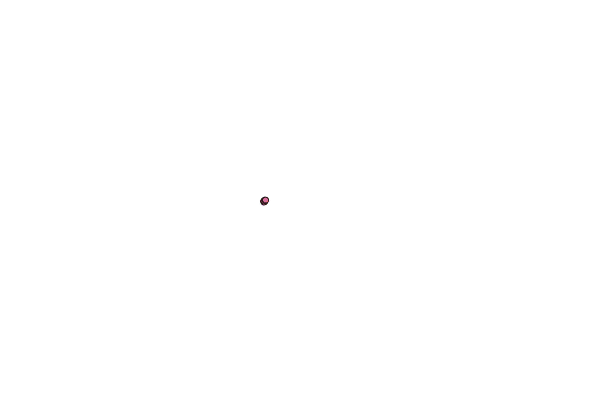

In [855]:
n_entries = size(u0)[1]
n_components = n_entries ÷ 2
n_steps = Int(T / Δt + 1)

@gif for ti=2:n_steps
    plot()
    t_init = max(1, ti-300)
    for i in 1:n_components
        xc, yc = 2(i-1)+1, 2i
        plot!(simulation[xc, t_init:ti], simulation[yc, t_init:ti], linewidth=2)
    end
    init_point = sol.u[begin]
    scatter!(init_point[1:2:end], init_point[2:2:end])
    plot!(legend=nothing, axis=nothing, border=:none)
    xlims!(xmin, xmax)
    ylims!(ymin, ymax)
end every 8